## Evaluation of infant names from 1880-2010, determine most popular girls names and see how this list changes over time

## import modules

In [1]:
import pandas as pd
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

## import data from files into a list of dataframes

In [2]:
path = 'yob*.csv'
files = glob.glob(path)

df= []
for file in files :
    df.append(pd.read_csv(file, index_col= None, header=None))

#Inspect loaded files
print(len(df))
print(df[0].head)
df[0].info()

137
<bound method NDFrame.head of               0  1     2
0          Mary  F  7065
1          Anna  F  2604
2          Emma  F  2003
3     Elizabeth  F  1939
4        Minnie  F  1746
5      Margaret  F  1578
6           Ida  F  1472
7         Alice  F  1414
8        Bertha  F  1320
9         Sarah  F  1288
10        Annie  F  1258
11        Clara  F  1226
12         Ella  F  1156
13     Florence  F  1063
14         Cora  F  1045
15       Martha  F  1040
16        Laura  F  1012
17       Nellie  F   995
18        Grace  F   982
19       Carrie  F   949
20        Maude  F   858
21        Mabel  F   808
22       Bessie  F   796
23       Jennie  F   793
24     Gertrude  F   787
25        Julia  F   783
26       Hattie  F   769
27        Edith  F   768
28       Mattie  F   704
29         Rose  F   700
...         ... ..   ...
1970      Philo  M     5
1971    Phineas  M     5
1972    Presley  M     5
1973     Ransom  M     5
1974      Reece  M     5
1975       Rene  M     5
1976    Roswell 

## Add column names and combine data into one dataframe

In [3]:
# Add column names
i=0
n = 1880
for item in df :
    df[i].columns =  ['Name', 'Sex', 'Count']
    df[i]['Year']= n
    i= i  + 1
    n= n + 1

#Concatenate the list of dataframes into one dataframe
names= pd.concat(df)
print('CONCATENTATED NAMES DATAFRAME')
names.info()
print(names.head())

CONCATENTATED NAMES DATAFRAME
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891556 entries, 0 to 32867
Data columns (total 4 columns):
Name     object
Sex      object
Count    int64
Year     int64
dtypes: int64(2), object(2)
memory usage: 72.2+ MB
        Name Sex  Count  Year
0       Mary   F   7065  1880
1       Anna   F   2604  1880
2       Emma   F   2003  1880
3  Elizabeth   F   1939  1880
4     Minnie   F   1746  1880


## Calculate popularity of names as percentage per births

In [4]:
names2 = names.copy()
total_births_by_year = names2.groupby('Year')['Count'].transform('sum')
names2['pct_name']= (names2['Count']/total_births_by_year)* 100
print('NAMES DATAFRAME WITH PCT NAME ADDED')
print(names2.tail())
print(names2.shape)

NAMES DATAFRAME WITH PCT NAME ADDED
         Name Sex  Count  Year  pct_name
32863  Zolton   M      5  2016  0.000137
32864  Zurich   M      5  2016  0.000137
32865  Zyahir   M      5  2016  0.000137
32866    Zyel   M      5  2016  0.000137
32867   Zylyn   M      5  2016  0.000137
(1891556, 5)


## Create a dataframe of girls names

In [5]:
#create dataframe with female names, with year as the index
female = names2['Sex'] == 'F'
names_f= names2[female]
print('FEMALE NAME DATAFRAME')
fnames_year= names_f.set_index('Year')
print(fnames_year.tail())
fnames_year.info()




FEMALE NAME DATAFRAME
         Name Sex  Count  pct_name
Year                              
2016  Zyliyah   F      5  0.000137
2016   Zymiah   F      5  0.000137
2016    Zynae   F      5  0.000137
2016  Zyndaya   F      5  0.000137
2016  Zyriyah   F      5  0.000137
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119630 entries, 1880 to 2016
Data columns (total 4 columns):
Name        1119630 non-null object
Sex         1119630 non-null object
Count       1119630 non-null int64
pct_name    1119630 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.7+ MB


## Select most popular girls names

In [6]:
top= fnames_year['pct_name'] >= 0.4
fnames_year_top= fnames_year[top]
del fnames_year_top['Sex']
del fnames_year_top['Count']
fnames_year_top= fnames_year_top.reset_index()

print('TOP FEMALE NAME DATAFRAME')
print(fnames_year_top.tail())
print(fnames_year_top.shape)
print(fnames_year_top.info())



TOP FEMALE NAME DATAFRAME
      Year      Name  pct_name
3172  2016      Emma  0.533744
3173  2016    Olivia  0.529126
3174  2016       Ava  0.446400
3175  2016    Sophia  0.441809
3176  2016  Isabella  0.404748
(3177, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 3 columns):
Year        3177 non-null int64
Name        3177 non-null object
pct_name    3177 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 74.5+ KB
None


In [7]:
#Pivot the top names dataframe to make the names columns, and reset the index
fnames_tidy = fnames_year_top.pivot_table(values='pct_name', index=['Year'], columns=['Name'])
fnames_tidy = fnames_tidy.fillna(0)
print(fnames_tidy.tail())
fnames_tidy.info()


Name  Abigail  Agnes  Alexis  Alice  Amanda  Amber  Amy  Angela  Anna  Annie  \
Year                                                                           
2012      0.0    0.0     0.0    0.0     0.0    0.0  0.0     0.0   0.0    0.0   
2013      0.0    0.0     0.0    0.0     0.0    0.0  0.0     0.0   0.0    0.0   
2014      0.0    0.0     0.0    0.0     0.0    0.0  0.0     0.0   0.0    0.0   
2015      0.0    0.0     0.0    0.0     0.0    0.0  0.0     0.0   0.0    0.0   
2016      0.0    0.0     0.0    0.0     0.0    0.0  0.0     0.0   0.0    0.0   

Name    ...     Susan  Tammy  Taylor  Teresa  Thelma  Tiffany  Tina  Tracy  \
Year    ...                                                                  
2012    ...       0.0    0.0     0.0     0.0     0.0      0.0   0.0    0.0   
2013    ...       0.0    0.0     0.0     0.0     0.0      0.0   0.0    0.0   
2014    ...       0.0    0.0     0.0     0.0     0.0      0.0   0.0    0.0   
2015    ...       0.0    0.0     0.0     0.0     

## Plot the top girls names in groups of five


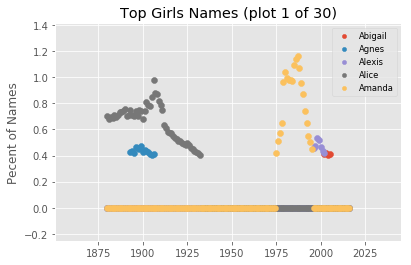

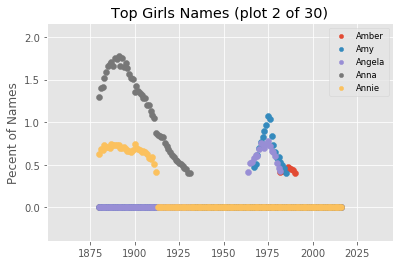

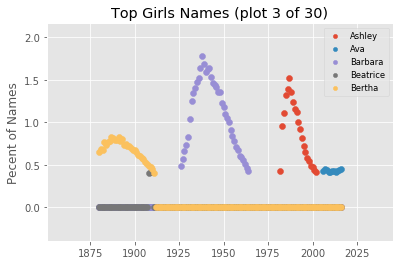

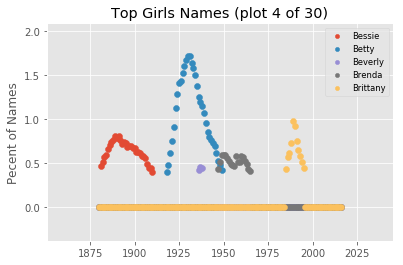

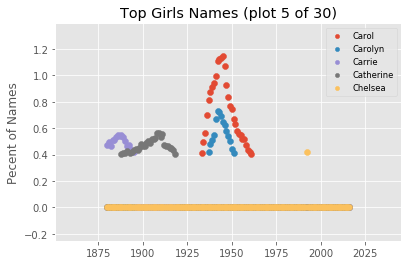

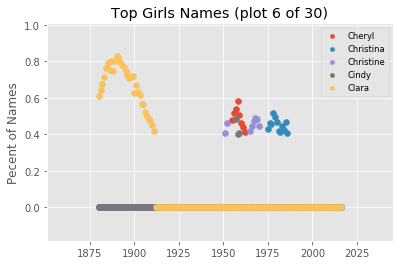

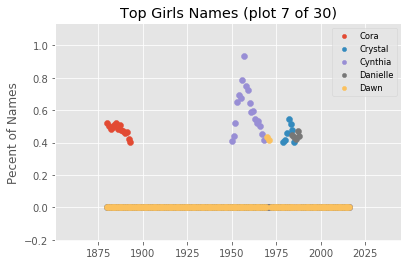

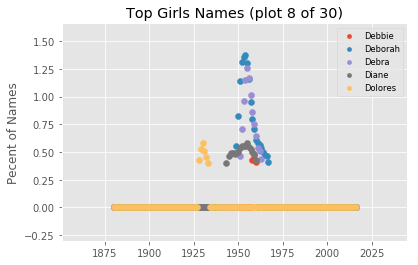

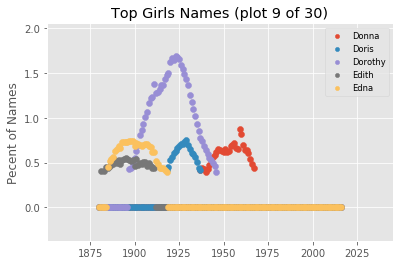

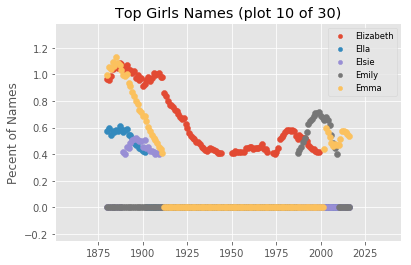

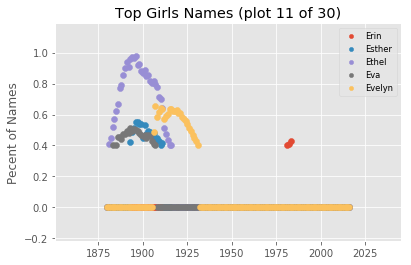

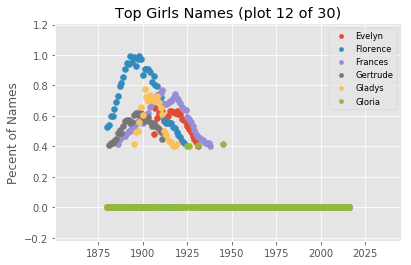

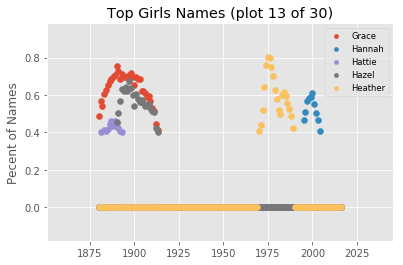

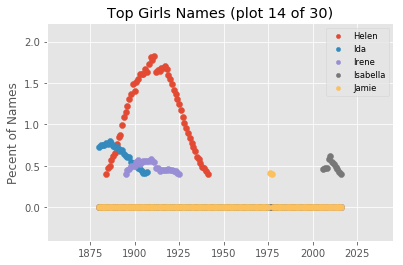

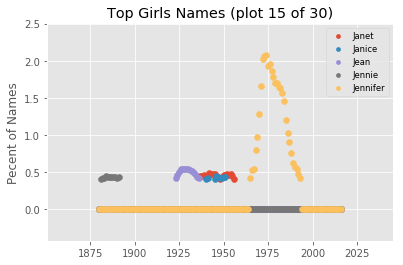

In [8]:
#Plot the top girls names in groups of five
fnames_tidy= fnames_tidy.reset_index()

def top_girls_names_1():
    colors=['red', 'blue', 'lime', 'deeppink']
    n=1
    for item in fnames_tidy :
        if n <= 5 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 1 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names1.pdf')
    plt.show()

def top_girls_names_2():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 6
    for item in fnames_tidy :
        if n <= 10 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 2 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names2.pdf')
    plt.show()

def top_girls_names_3():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 11
    for item in fnames_tidy :
        if n <= 15 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 3 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_name3.pdf')
    plt.show()
    
def top_girls_names_4():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 16
    for item in fnames_tidy :
        if n <= 20 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 4 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names4.pdf')
    plt.show()
    
def top_girls_names_5():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 21
    for item in fnames_tidy :
        if n <= 25 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 5 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names5.pdf')
    plt.show()  
    
def top_girls_names_6():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 26
    for item in fnames_tidy :
        if n <= 30 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 6 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names6.pdf')
    plt.show()
    
    
def top_girls_names_7():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 31
    for item in fnames_tidy :
        if n <= 35 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 7 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names7.pdf')
    plt.show()
    
def top_girls_names_8():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 36
    for item in fnames_tidy :
        if n <= 40 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 8 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names8.pdf')
    plt.show()

def top_girls_names_9():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 41
    for item in fnames_tidy :
        if n <= 45 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 9 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names9.pdf')
    plt.show()    

def top_girls_names_10():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 46
    for item in fnames_tidy :
        if n <= 50 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 10 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names10.pdf')
    plt.show()    
    
def top_girls_names_11():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 51
    for item in fnames_tidy :
        if n <= 55 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 11 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names11.pdf')
    plt.show() 
    
def top_girls_names_12():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 55
    for item in fnames_tidy :
        if n <= 60 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 12 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names12.pdf')
    plt.show()  
    
def top_girls_names_13():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 61
    for item in fnames_tidy :
        if n <= 65 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 13 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names13.pdf')
    plt.show()  
    
def top_girls_names_14():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 66
    for item in fnames_tidy :
        if n <= 70 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 14 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names14.pdf')
    plt.show() 
    
def top_girls_names_15():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 71
    for item in fnames_tidy :
        if n <= 75 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 15 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
    plt.savefig('scatter_top_girls_names15.pdf')
    plt.show() 
top_girls_names_1()
top_girls_names_2()
top_girls_names_3()
top_girls_names_4()
top_girls_names_5()
top_girls_names_6()
top_girls_names_7()
top_girls_names_8()
top_girls_names_9()
top_girls_names_10()
top_girls_names_11()
top_girls_names_12()
top_girls_names_13()
top_girls_names_14()
top_girls_names_15()








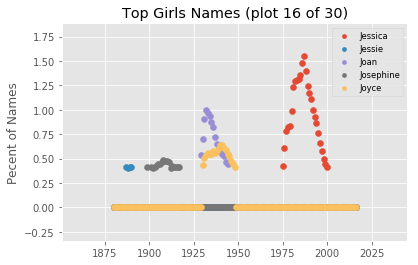

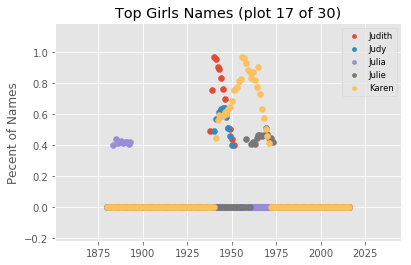

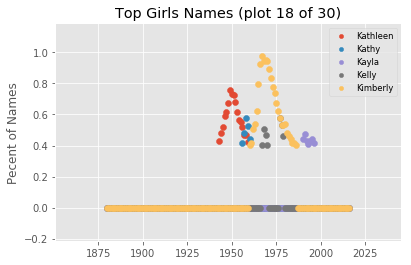

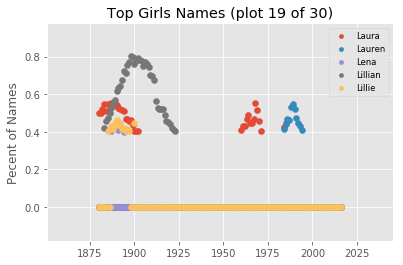

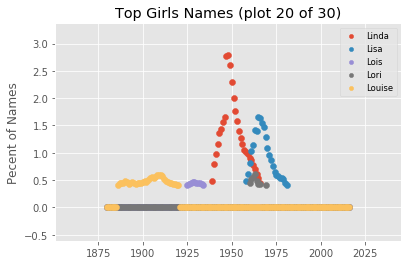

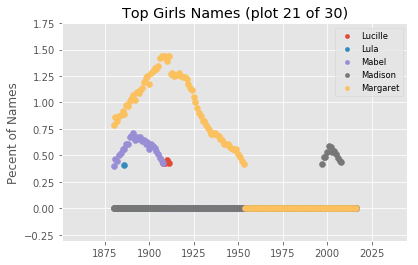

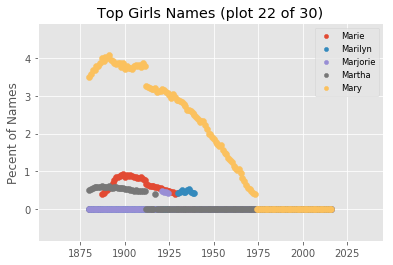

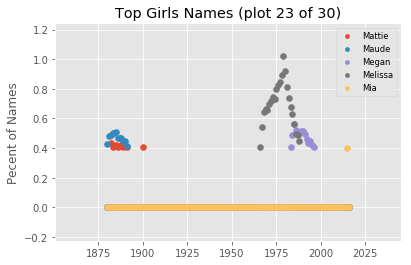

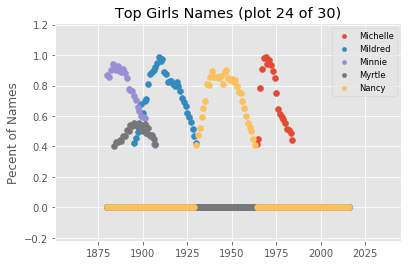

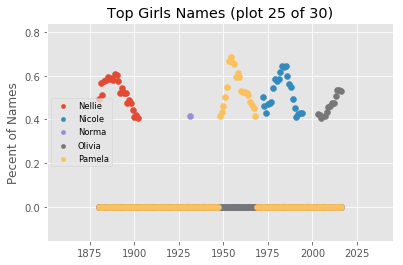

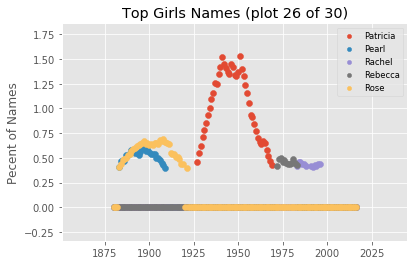

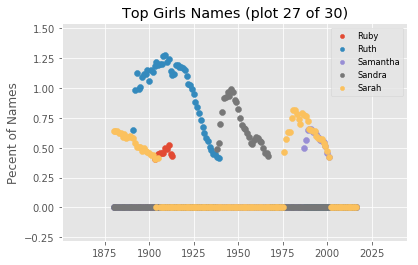

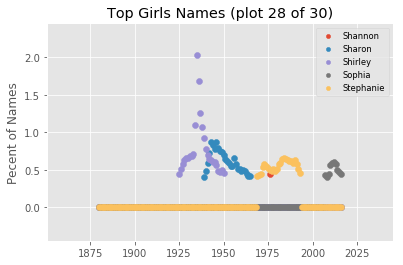

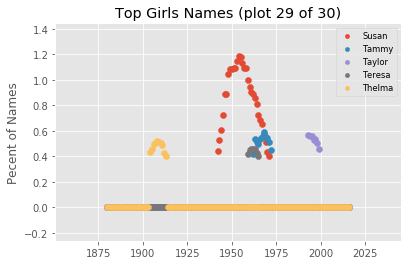

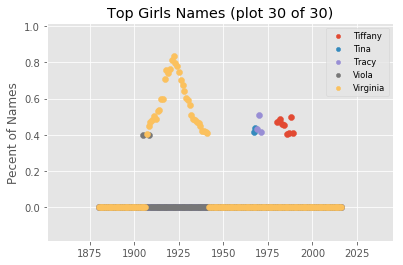

In [9]:
def top_girls_names_16():
    colors=['red', 'blue', 'lime', 'deeppink']
    n=76
    for item in fnames_tidy :
        if n <= 80 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 16 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names1.pdf')
    plt.show()

def top_girls_names_17():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 81
    for item in fnames_tidy :
        if n <= 85 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 17 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names2.pdf')
    plt.show()

def top_girls_names_18():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 86
    for item in fnames_tidy :
        if n <= 90 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 18 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_name3.pdf')
    plt.show()
    
def top_girls_names_19():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 91
    for item in fnames_tidy :
        if n <= 95 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 19 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names4.pdf')
    plt.show()
    
def top_girls_names_20():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 96
    for item in fnames_tidy :
        if n <= 100 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 20 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names5.pdf')
    plt.show()  
    
def top_girls_names_21():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 101
    for item in fnames_tidy :
        if n <= 105 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 21 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names6.pdf')
    plt.show()
    
    
def top_girls_names_22():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 106
    for item in fnames_tidy :
        if n <= 110 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 22 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names7.pdf')
    plt.show()
    
def top_girls_names_23():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 111
    for item in fnames_tidy :
        if n <= 115 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 23 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names8.pdf')
    plt.show()

def top_girls_names_24():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 116
    for item in fnames_tidy :
        if n <= 120 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 24 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names9.pdf')
    plt.show()    

def top_girls_names_25():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 121
    for item in fnames_tidy :
        if n <= 125 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 25 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names10.pdf')
    plt.show()    
    
def top_girls_names_26():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 126
    for item in fnames_tidy :
        if n <= 130 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 26 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names11.pdf')
    plt.show() 
    
def top_girls_names_27():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 131
    for item in fnames_tidy :
        if n <= 135 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 27 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names12.pdf')
    plt.show()  
    
def top_girls_names_28():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 136
    for item in fnames_tidy :
        if n <= 140 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 28 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names13.pdf')
    plt.show()  
    
def top_girls_names_29():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 141
    for item in fnames_tidy :
        if n <= 145 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 29 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names14.pdf')
    plt.show() 
    
def top_girls_names_30():
    colors=['red', 'blue', 'lime', 'deeppink']
    n= 146
    for item in fnames_tidy :
        if n <= 150 :
            x= fnames_tidy['Year']
            y = fnames_tidy.iloc[0:, n]
            plt.style.use('ggplot')
            plt.scatter(x, y)
            n= n + 1
#     plt.ylim(-0.05, 0.7)
    plt.subplots_adjust(left=0.1)
    plt.ylabel('Pecent of Names')
    plt.title('Top Girls Names (plot 30 of 30)')
    plt.legend(loc='best', fontsize='small', markerscale=0.7)
    plt.margins(0.2)
#     plt.savefig('scatter_top_girls_names15.pdf')
    plt.show() 
top_girls_names_16()
top_girls_names_17()
top_girls_names_18()
top_girls_names_19()
top_girls_names_20()
top_girls_names_21()
top_girls_names_22()
top_girls_names_23()
top_girls_names_24()
top_girls_names_25()
top_girls_names_26()
top_girls_names_27()
top_girls_names_28()
top_girls_names_29()
top_girls_names_30()






